In [1]:
import pandas as pd
import os

In [2]:
english_train = pd.read_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), 'Data\english_train.csv'))
english_validation = pd.read_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), 'Data\english_validation.csv'))

df_english = pd.concat([english_train, english_validation], ignore_index=True)

malayalam_train = pd.read_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), 'Data\malayalam_train.csv'))
malayalam_validation = pd.read_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), 'Data\malayalam_validation.csv'))

df_malayalam = pd.concat([malayalam_train, malayalam_validation], ignore_index=True)

tamil_train = pd.read_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), r'Data\tamil_train.csv'))
tamil_validation = pd.read_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), r'Data\tamil_validation.csv'))

df_tamil = pd.concat([tamil_train, tamil_validation], ignore_index=True)

In [3]:
## Remove Punctuation
import string
def remove_punctuation(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation and char not in '.’'])
    return text_nopunct

df_english['text'] = df_english['text'].apply(lambda x: remove_punctuation(x))

## Tokenize

In [4]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

english_stop_words = list(set(stopwords.words('english')))
english_stop_words.append('I')
english_stop_words.append('i')
def tokenize(tweet, remove_stopwords=False):
    tknzr = TweetTokenizer()
    tokens = tknzr.tokenize(tweet)
    if remove_stopwords:
        tokens = [w for w in tokens if not w in english_stop_words]
    return tokens

In [5]:
df_english['tokens_without_stopwords'] = df_english['text'].apply(lambda x: tokenize(x, remove_stopwords=True))
df_english['tokens_with_stopwords'] = df_english['text'].apply(lambda x: tokenize(x, remove_stopwords=False))

In [6]:
# from indicnlp import common
# from indicnlp import loader
# from indicnlp.tokenize import indic_tokenize

# # git clone https://github.com/anoopkunchukuttan/indic_nlp_resources.git

# # The path to the local git repo for Indic NLP Resources
# INDIC_NLP_RESOURCES = r"D:\Desktop\ML Group Project\indic_nlp_resources"

# # Export the path to the Indic NLP Resources directory programmatically
# common.set_resources_path(INDIC_NLP_RESOURCES)

# # Initialize the Indic NLP library
# loader.load()

In [7]:
# tamil_stop_words = []
# with open('TamilStopWords.txt', encoding="utf8") as f:
#     for line in f:
#         tamil_stop_words.append(line.strip())

# def tokenize_tamil(tweet, remove_stopwords=False):
#     tokens = indic_tokenize.trivial_tokenize(tweet)
#     if remove_stopwords:
#         tokens = [w for w in tokens if not w in tamil_stop_words]
#     return tokens

# df_tamil['tokens_without_stopwords'] = df_tamil['text'].apply(lambda x: tokenize_tamil(x, remove_stopwords=True))
# df_tamil['tokens_with_stopwords'] = df_tamil['text'].apply(lambda x: tokenize_tamil(x, remove_stopwords=False))

In [8]:
df_tamil['tokens_without_stopwords'] = df_tamil['text'].apply(lambda x: tokenize(x, remove_stopwords=True))
df_tamil['tokens_with_stopwords'] = df_tamil['text'].apply(lambda x: tokenize(x, remove_stopwords=False))

In [9]:
df_malayalam['tokens_without_stopwords'] = df_malayalam['text'].apply(lambda x: tokenize(x, remove_stopwords=True))
df_malayalam['tokens_with_stopwords'] = df_malayalam['text'].apply(lambda x: tokenize(x, remove_stopwords=False))

In [10]:
df_english['Word Count without Stopwords'] = df_english['tokens_without_stopwords'].apply(lambda x: len(x))
df_english['Character Count'] = df_english['text'].apply(lambda x: len(x))
df_english['Average Word Length without Stopwords'] = df_english['Character Count'] / df_english['Word Count without Stopwords']
df_english['Word Count with Stopwords'] = df_english['tokens_with_stopwords'].apply(lambda x: len(x))
df_english['Average Word Length with Stopwords'] = df_english['Character Count'] / df_english['Word Count with Stopwords']
df_english['Text without Stopwords'] = df_english['tokens_without_stopwords'].apply(lambda x: ' '.join(x))

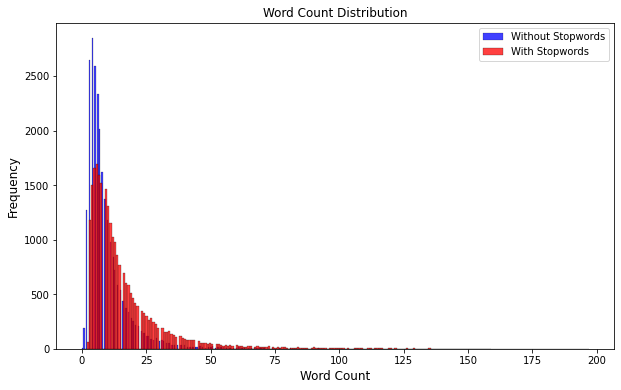

In [11]:
# Histogram of Word Count without Stopwords and with Stopwords on same plot
import matplotlib.pyplot as plt
import seaborn as sns
# new plot
fig, ax = plt.subplots(figsize=(10, 6))
# plot histogram
sns.histplot(df_english['Word Count without Stopwords'], color='blue', label='Without Stopwords', ax=ax)
sns.histplot(df_english['Word Count with Stopwords'], color='red', label='With Stopwords', ax=ax)
# set title and labels
ax.set_title('Word Count Distribution', fontsize=12)
ax.set_xlabel('Word Count', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

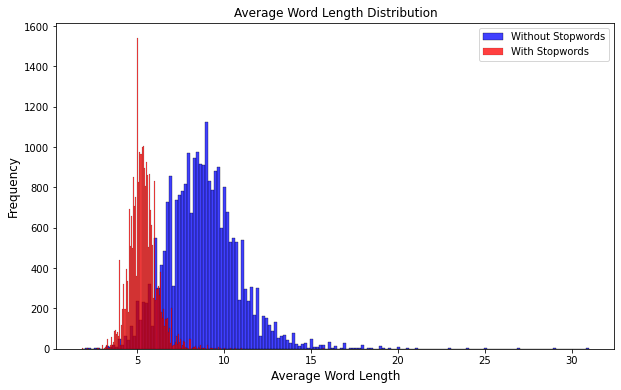

In [12]:
# Histogram of Average Word Length without Stopwords and with Stopwords on same plot
# new plot
fig, ax = plt.subplots(figsize=(10, 6))
# plot histogram
sns.histplot(df_english['Average Word Length without Stopwords'], color='blue', label='Without Stopwords', ax=ax)
sns.histplot(df_english['Average Word Length with Stopwords'], color='red', label='With Stopwords', ax=ax)
# set title and labels
ax.set_title('Average Word Length Distribution', fontsize=12)
ax.set_xlabel('Average Word Length', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

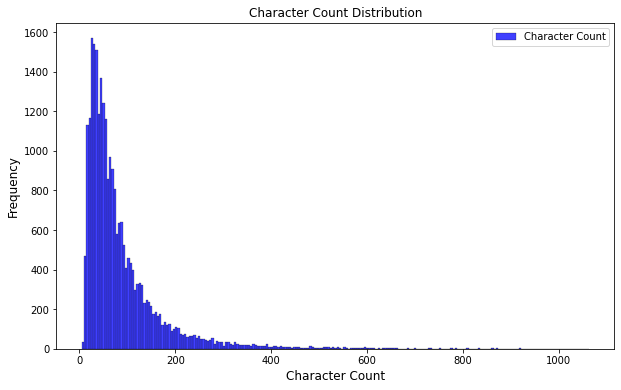

In [13]:
# Histogram of character count
# new plot
fig, ax = plt.subplots(figsize=(10, 6))
# plot histogram
sns.histplot(df_english['Character Count'], color='blue', label='Character Count', ax=ax)
# set title and labels
ax.set_title('Character Count Distribution', fontsize=12)
ax.set_xlabel('Character Count', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

In [14]:
corpus_without_stopwords = ' '.join(df_english['Text without Stopwords'])
corpus_without_stopwords = corpus_without_stopwords.split()

corpus_with_stopwords = ' '.join(df_english['text'])
corpus_with_stopwords = corpus_with_stopwords.split()

# create a dictionary of words and their frequency

def create_dictionary(corpus):
    word_freq = {}
    for word in corpus:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1
    return word_freq

word_freq_without_stopwords = create_dictionary(corpus_without_stopwords)
word_freq_with_stopwords = create_dictionary(corpus_with_stopwords)
# get stop word frequency
stop_word_freq = {}
for word in english_stop_words:
    if word in word_freq_with_stopwords.keys():
        stop_word_freq[word] = word_freq_with_stopwords[word]

In [15]:
# sort the dictionary by values
sorted_stop_word_freq = sorted(stop_word_freq.items(), key=lambda x: x[1], reverse=True)
word_freq_with_stopwords = sorted(word_freq_with_stopwords.items(), key=lambda x: x[1], reverse=True)
word_freq_without_stopwords = sorted(word_freq_without_stopwords.items(), key=lambda x: x[1], reverse=True)

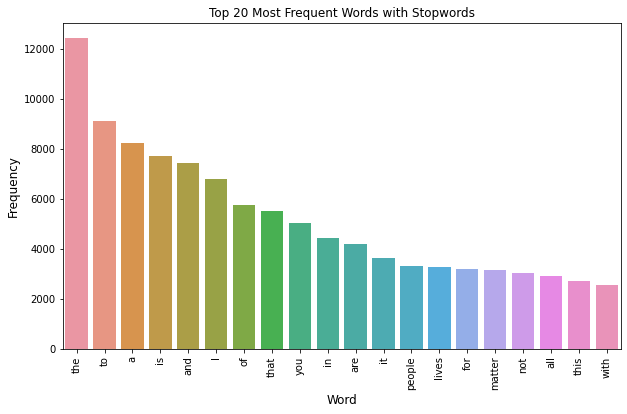

In [16]:
# plot the top 20 most frequent words
# new plot
fig, ax = plt.subplots(figsize=(10, 6))
# plot bar chart
sns.barplot(x=[x[0] for x in word_freq_with_stopwords[:20]], y=[x[1] for x in word_freq_with_stopwords[:20]], ax=ax)
# set title and labels
ax.set_title('Top 20 Most Frequent Words with Stopwords', fontsize=12)
ax.set_xlabel('Word', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90)
plt.show()

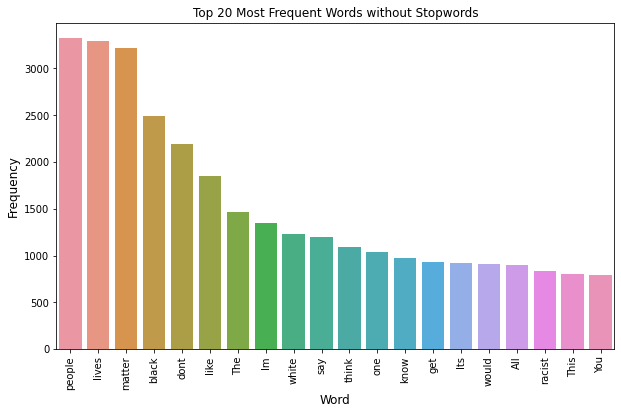

In [17]:
# plot the top 20 most frequent words without stopwords
# new plot
fig, ax = plt.subplots(figsize=(10, 6))
# plot bar chart
sns.barplot(x=[x[0] for x in word_freq_without_stopwords[:20]], y=[x[1] for x in word_freq_without_stopwords[:20]], ax=ax)
# set title and labels
ax.set_title('Top 20 Most Frequent Words without Stopwords', fontsize=12)
ax.set_xlabel('Word', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90)
plt.show()

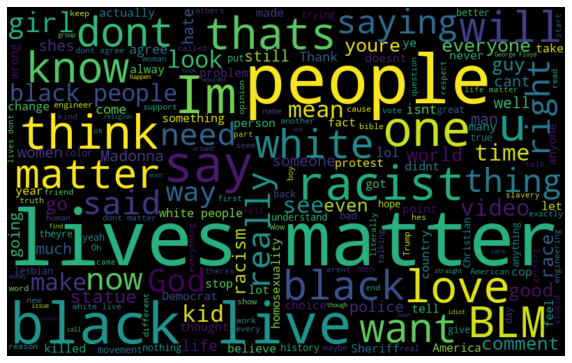

In [18]:
# word cloud
from wordcloud import WordCloud
# create word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(corpus_with_stopwords))
# plot word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

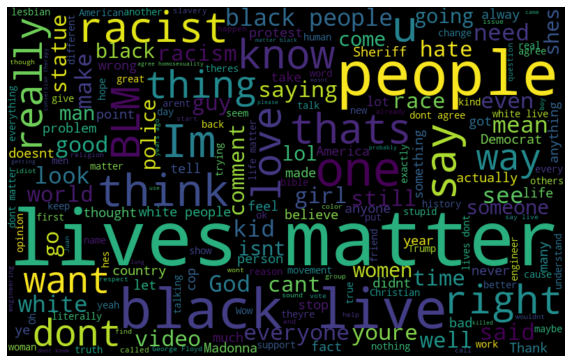

In [19]:
# word cloud
from wordcloud import WordCloud
# create word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(corpus_without_stopwords))
# plot word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [20]:
df_english['label'].value_counts()

1    23347
0     2234
2       24
Name: label, dtype: int64

<AxesSubplot:title={'center':'Count (label)'}>

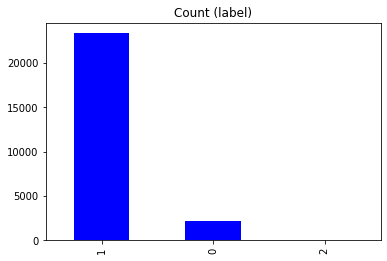

In [21]:
df_english['label'].value_counts().plot(kind='bar', title='Count (label)', color='blue')

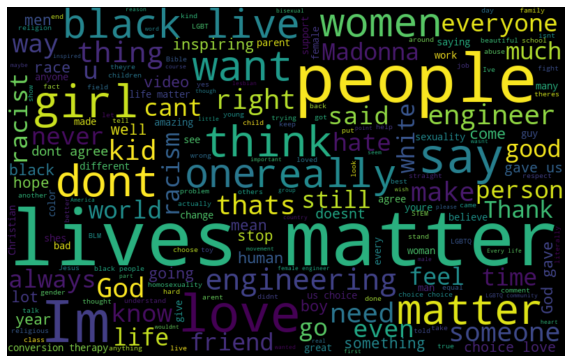

In [22]:
# Word Cloud for Class 0
# create word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(df_english[df_english['label'] == 0]['Text without Stopwords']))
# plot word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

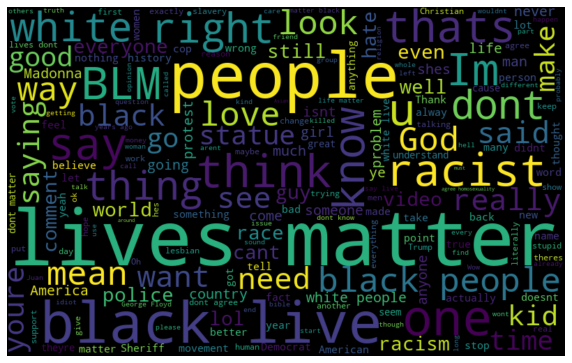

In [23]:
# Word Cloud for Class 1
# create word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(df_english[df_english['label'] == 1]['Text without Stopwords']))
# plot word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

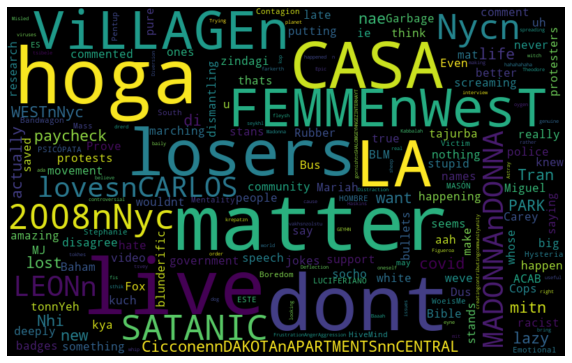

In [24]:
# Word Cloud for Class 2
# create word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(df_english[df_english['label'] == 2]['Text without Stopwords']))
# plot word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [25]:
# Sentiment Analysis using TextBlob
from textblob import TextBlob
# create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
# create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
# create two new columns 'Subjectivity' & 'Polarity'
df_english['Subjectivity'] = df_english['text'].apply(getSubjectivity)
df_english['Polarity'] = df_english['text'].apply(getPolarity)

In [26]:
df_english

,text,label,tokens_without_stopwords,tokens_with_stopwords,Word Count without Stopwords,Character Count,Average Word Length without Stopwords,Word Count with Stopwords,Average Word Length with Stopwords,Text without Stopwords,Subjectivity,Polarity
0,these tiktoks radiate gay chaotic energy and i...,1,"[tiktoks, radiate, gay, chaotic, energy, love]","[these, tiktoks, radiate, gay, chaotic, energy...",6,54,9.000000,10,5.400000,tiktoks radiate gay chaotic energy love,0.591667,0.458333
1,Champions Again He got killed for using false ...,1,"[Champions, Again, He, got, killed, using, fal...","[Champions, Again, He, got, killed, for, using...",8,51,6.375000,9,5.666667,Champions Again He got killed using false money,0.300000,-0.300000
2,Its not that all lives dont matter,1,"[Its, lives, dont, matter]","[Its, not, that, all, lives, dont, matter]",4,34,8.500000,7,4.857143,Its lives dont matter,0.000000,0.000000
3,Is it really that difficult to understand Blac...,1,"[Is, really, difficult, understand, Black, liv...","[Is, it, really, that, difficult, to, understa...",47,447,9.510638,79,5.658228,Is really difficult understand Black lives mat...,0.415040,-0.033889
4,Whenever we say black isnt that racists Why d...,1,"[Whenever, say, black, isnt, racists, Why, don...","[Whenever, we, say, black, isnt, that, racists...",9,68,7.555556,12,5.666667,Whenever say black isnt racists Why dont say A...,0.433333,-0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...
25600,Such fake sentiment,1,"[Such, fake, sentiment]","[Such, fake, sentiment]",3,20,6.666667,3,6.666667,Such fake sentiment,0.750000,-0.250000
25601,A G black lives arent undervalued compared to ...,1,"[A, G, black, lives, arent, undervalued, compa...","[A, G, black, lives, arent, undervalued, compa...",10,64,6.400000,11,5.818182,A G black lives arent undervalued compared whi...,0.216667,-0.083333
25602,People who pulled it down can and will be arre...,1,"[People, pulled, arrested, causing, damage, pu...","[People, who, pulled, it, down, can, and, will...",8,92,11.500000,17,5.411765,People pulled arrested causing damage public p...,0.351852,0.214815
25603,Aaron Castellanos It will be a two hour movie ...,1,"[Aaron, Castellanos, It, two, hour, movie, sho...","[Aaron, Castellanos, It, will, be, a, two, hou...",10,80,8.000000,13,6.153846,Aaron Castellanos It two hour movie showing pe...,0.000000,0.000000


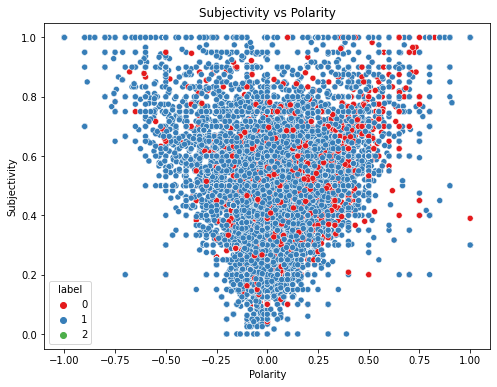

In [27]:
# plot subjectivity and polarity
from turtle import color
plt.figure(figsize=(8,6))
sns.scatterplot(x = df_english['Polarity'], y = df_english['Subjectivity'], hue=df_english['label'], palette='Set1')
plt.title('Subjectivity vs Polarity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [28]:
# Vader Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# create a function to get the sentiment scores (using compound score as a metric)
def getSentimentScores(text):
    sid = SentimentIntensityAnalyzer()
    sentiment = sid.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return 1
    elif sentiment['compound'] <= -0.05:
        return -1
    else:
        return 0
# create a new column 'Sentiment Scores'
df_english['Sentiment Scores'] = df_english['text'].apply(getSentimentScores)

In [30]:
df_english

,text,label,tokens_without_stopwords,tokens_with_stopwords,Word Count without Stopwords,Character Count,Average Word Length without Stopwords,Word Count with Stopwords,Average Word Length with Stopwords,Text without Stopwords,Subjectivity,Polarity,Sentiment Scores
0,these tiktoks radiate gay chaotic energy and i...,1,"[tiktoks, radiate, gay, chaotic, energy, love]","[these, tiktoks, radiate, gay, chaotic, energy...",6,54,9.000000,10,5.400000,tiktoks radiate gay chaotic energy love,0.591667,0.458333,1
1,Champions Again He got killed for using false ...,1,"[Champions, Again, He, got, killed, using, fal...","[Champions, Again, He, got, killed, for, using...",8,51,6.375000,9,5.666667,Champions Again He got killed using false money,0.300000,-0.300000,-1
2,Its not that all lives dont matter,1,"[Its, lives, dont, matter]","[Its, not, that, all, lives, dont, matter]",4,34,8.500000,7,4.857143,Its lives dont matter,0.000000,0.000000,0
3,Is it really that difficult to understand Blac...,1,"[Is, really, difficult, understand, Black, liv...","[Is, it, really, that, difficult, to, understa...",47,447,9.510638,79,5.658228,Is really difficult understand Black lives mat...,0.415040,-0.033889,-1
4,Whenever we say black isnt that racists Why d...,1,"[Whenever, say, black, isnt, racists, Why, don...","[Whenever, we, say, black, isnt, that, racists...",9,68,7.555556,12,5.666667,Whenever say black isnt racists Why dont say A...,0.433333,-0.166667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25600,Such fake sentiment,1,"[Such, fake, sentiment]","[Such, fake, sentiment]",3,20,6.666667,3,6.666667,Such fake sentiment,0.750000,-0.250000,-1
25601,A G black lives arent undervalued compared to ...,1,"[A, G, black, lives, arent, undervalued, compa...","[A, G, black, lives, arent, undervalued, compa...",10,64,6.400000,11,5.818182,A G black lives arent undervalued compared whi...,0.216667,-0.083333,0
25602,People who pulled it down can and will be arre...,1,"[People, pulled, arrested, causing, damage, pu...","[People, who, pulled, it, down, can, and, will...",8,92,11.500000,17,5.411765,People pulled arrested causing damage public p...,0.351852,0.214815,-1
25603,Aaron Castellanos It will be a two hour movie ...,1,"[Aaron, Castellanos, It, two, hour, movie, sho...","[Aaron, Castellanos, It, will, be, a, two, hou...",10,80,8.000000,13,6.153846,Aaron Castellanos It two hour movie showing pe...,0.000000,0.000000,0


<AxesSubplot:title={'center':'Count Class 0 (Sentiment Scores)'}>

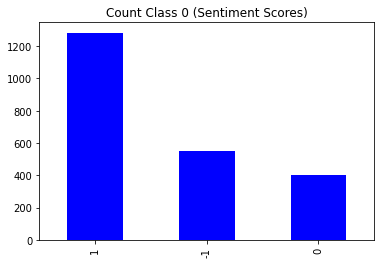

In [35]:
df_english[df_english['label']==0]['Sentiment Scores'].value_counts().plot(kind='bar', title='Count Class 0 (Sentiment Scores)', color='blue')

<AxesSubplot:title={'center':'Count Class 1 (Sentiment Scores)'}>

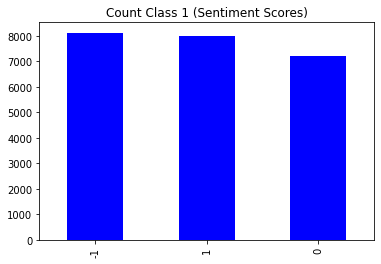

In [36]:
df_english[df_english['label']==1]['Sentiment Scores'].value_counts().plot(kind='bar', title='Count Class 1 (Sentiment Scores)', color='blue')

<AxesSubplot:title={'center':'Count Class 2 (Sentiment Scores)'}>

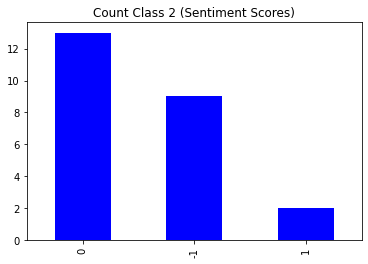

In [37]:
df_english[df_english['label']==2]['Sentiment Scores'].value_counts().plot(kind='bar', title='Count Class 2 (Sentiment Scores)', color='blue')